## Minimum of Rosenbrock's Function
### Jennefer Maldonado
Using steepest descent and Newton's method this notebook will calculate the starting points in three intervals and plot the approximate solutions.
Rosenbrock's function is $f(x,y)=100(y-x^2)^2+(1-x)^2$

In [56]:
"""
Author : Jennefer Maldonado
Date   : 3/5/2021
Purpose: Solve Rosenbrock's Function
"""

import numdifftools as nd
import scipy
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import numpy as np
import math

# Function for the rosenbrock function
# returns the value given vector x
def rosenbrock(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

# Function for the gradient of the rosenbrock function
# returns nparray with the gradient vector 
def gradient(x):
    return np.array([400*x[0]*(x[1]-x[0]**2)-2*(1-x[0]), 200*(x[1]-x[0]**2)]).reshape([-1,1])

# Function for the hessian of the rosenbrock function
# returns list with hessian values
def hessian(x):
    return [[400*x[1]-1200*x[0]**2+1, 400*x[0]], [-400*x[0], 200]]

# Function for steepest descent algorithm
# returns next step of algorithm given previous step
# x_k+1 = x_k-a*grad(f)
def steepest_descent(x, y):
    #starting point
    start = [x,y]
    # find gradient
    direction = nd.Gradient(rosenbrock)([x,y])
    neg_dir = np.negative(direction)
    # find the smallest alpha
    result = minimize_scalar(lambda alpha: rosenbrock(x - alpha * gradient(start)))
    # use the smallest in next step
    alpha = result.x
    return start - alpha*direction
    
# Function for newton's method
# returns next step of algorithm given previous step
def newtons_method(x,y):
    #starting point
    start = [x,y]
    # find gradient
    direction = nd.Gradient(rosenbrock)([x,y])
    neg_dir = np.negative(direction)
    # find hessian
    Hf = hessian(start)
    # some linear equation
    sk = np.linalg.solve(Hf, neg_dir)
    return start - sk


## Newton's Method Plots

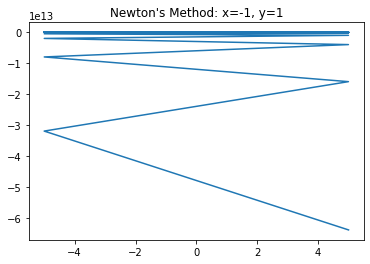

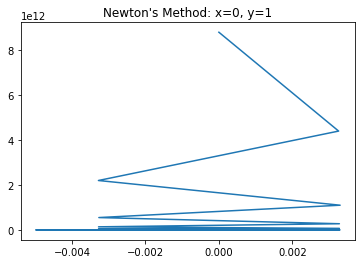

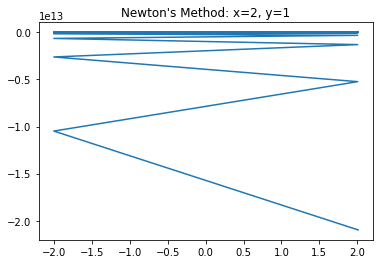

In [57]:
x1 = -1
y1 = 1
x_list1 = [-1]
y_list1 = [1]
for i in range(0,40):
    newpt = newtons_method(x1,y1)
    x1 = newpt[0]
    y1 = newpt[1]
    x_list1.append(x1)
    y_list1.append(y1)
    
plt.plot(x_list1, y_list1)
plt.title("Newton's Method: x=-1, y=1")
plt.show()

x2 = 0
y2 = 1
x_list2 = [0]
y_list2 = [1]
for i in range(0,43):
    newpt = newtons_method(x2,y2)
    x2 = newpt[0]
    y2 = newpt[1]
    x_list2.append(x2)
    y_list2.append(y2)
    
plt.plot(x_list2, y_list2)
plt.title("Newton's Method: x=0, y=1")
plt.show()

x3 = 2
y3 = 1
x_list3 = [2]
y_list3 = [1]
for i in range(0,40):
    newpt = newtons_method(x3,y3)
    x3 = newpt[0]
    y3 = newpt[1]
    x_list3.append(x3)
    y_list3.append(y3)
    
plt.plot(x_list3, y_list3)
plt.title("Newton's Method: x=2, y=1")
plt.show()

### Analysis for Newton's Method
I wrote the Newton's method code using numdifftools for the gradient, a custom hessian function, and np.linalg.solve to find $s_k$. The plots show that the method converges after certain steps as long as it is close to the initial point. The further away the point is the higher the number of iterations are needed and there is a risk that it will not converge.

## Steepest Descent

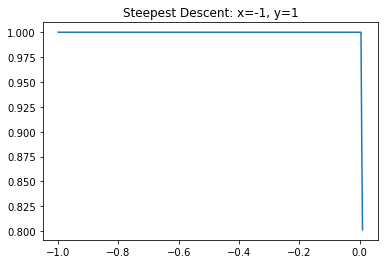

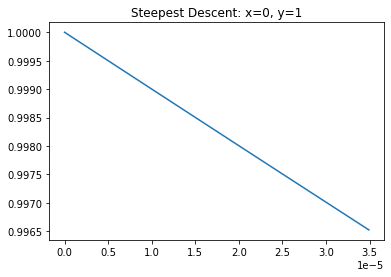

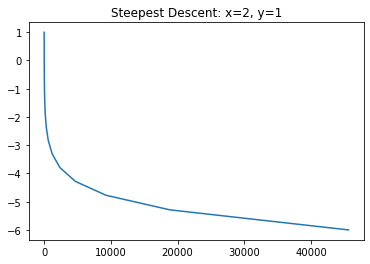

In [58]:
x1 = -1
y1 = 1
x_list1 = [-1]
y_list1 = [1]
for i in range(0,30):
    newpt = steepest_descent(x1,y1)
    x1 = newpt[0]
    y1 = newpt[1]
    x_list1.append(x1)
    y_list1.append(y1)
    
plt.plot(x_list1, y_list1)
plt.title("Steepest Descent: x=-1, y=1")
plt.show()

x2 = 0
y2 = 1
x_list2 = [0]
y_list2 = [1]
for i in range(0,30):
    newpt = steepest_descent(x2,y2)
    x2 = newpt[0]
    y2 = newpt[1]
    x_list2.append(x2)
    y_list2.append(y2)
    
plt.plot(x_list2, y_list2)
plt.title("Steepest Descent: x=0, y=1")
plt.show()

x3 = 2
y3 = 1
x_list3 = [2]
y_list3 = [1]
for i in range(0,30):
    newpt = steepest_descent(x3,y3)
    x3 = newpt[0]
    y3 = newpt[1]
    x_list3.append(x3)
    y_list3.append(y3)
    
plt.plot(x_list3, y_list3)
plt.title("Steepest Descent: x=2, y=1")
plt.show()

### Analysis of Steepest Descent
I wrote the Newton's method code using numdifftools for the gradient, a custom hessian function, and scipy.optimize minimize scalar. The plots show this method converges much more smoothly unlike newton's jagged patterns. It always makes good progress at each step giving it less risk to fail.